<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/HR_Attrition_using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/Attrition_LDA.csv")

In [0]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


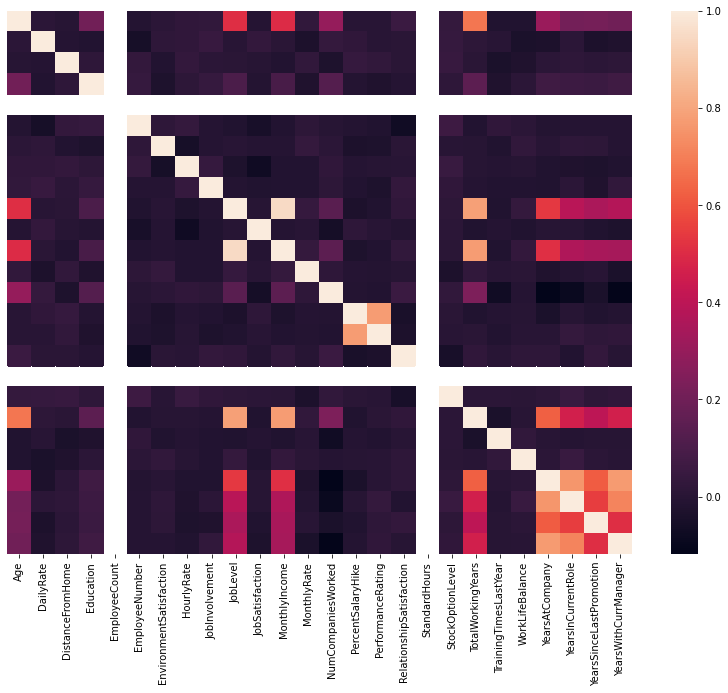

In [0]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(),yticklabels=False,cbar=True)

The above data shows there is a severe correlation in the data. Dropping these features may cause to lose enough information. We will try using decomposition to solve this problem

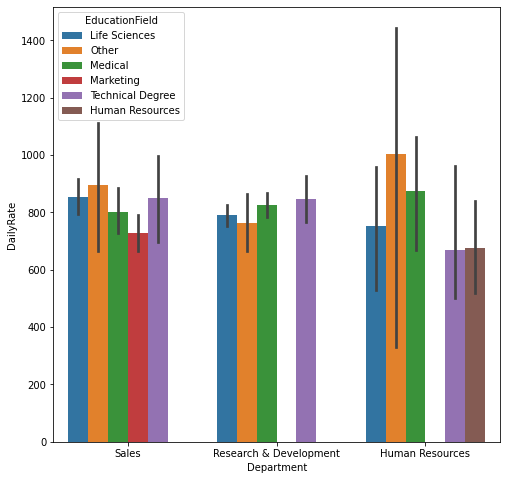

In [0]:
plt.figure(figsize=(8,8))
sns.barplot(x=data["Department"],y=data["DailyRate"],hue=data["EducationField"])

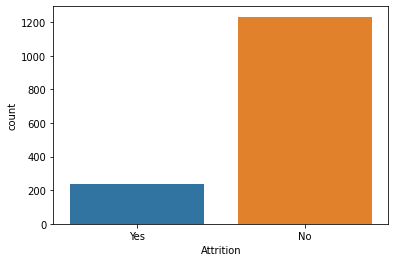

In [0]:
sns.countplot(data["Attrition"])

In [0]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From the above, we can see that there are 9 categorical data. Here we have to create dummy variables of them.

In [0]:
data["BusinessTravel"]=pd.get_dummies(data["BusinessTravel"],drop_first=True)
data["Department"]=pd.get_dummies(data["Department"],drop_first=True)
data["EducationField"]=pd.get_dummies(data["EducationField"],drop_first=True)
data["Gender"]=pd.get_dummies(data["Gender"],drop_first=True)
data["JobRole"]=pd.get_dummies(data["JobRole"],drop_first=True)
data["MaritalStatus"]=pd.get_dummies(data["MaritalStatus"],drop_first=True)

In [0]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,0,1102,0,1,2,1,1,1,2,0,94,3,2,0,4,0,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,3,1,61,2,2,0,2,1,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,0,1373,1,2,2,0,1,4,4,1,92,2,1,0,3,0,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,4,0,56,3,1,0,3,1,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,0,591,1,2,1,0,1,7,1,1,40,3,1,0,2,1,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   uint8 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   uint8 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   uint8 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   uint8 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [0]:
def strtobin(a):
  if a=="Yes":
    return 1
  elif a=="Y":
    return 1
  else:
    return 0

In [0]:
data['Attrition']=data['Attrition'].apply(strtobin)

In [0]:
data["Over18"]=data["Over18"].apply(strtobin)
data["OverTime"]=data["OverTime"].apply(strtobin)

In [0]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,2,0,94,3,2,0,4,0,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,0,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,0,1,4,4,1,92,2,1,0,3,0,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,0,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,0,1,7,1,1,40,3,1,0,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   uint8
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   uint8
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   uint8
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   uint8
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [0]:
x=data.iloc[:,data.columns!="Attrition"]
y=data.iloc[:,data.columns=="Attrition"]

In [0]:
x.shape

(1470, 34)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

**Standardizing the variables**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
x_train_sc=StandardScaler().fit_transform(x_train)
x_test_sc=StandardScaler().fit_transform(x_test)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier=LogisticRegression(penalty="l2",solver="sag",C=1)

In [0]:
start_time=time.time()
model=classifier.fit(x_train_sc,y_train)
stop_time=time.time()
time_diff=stop_time-start_time
print(time_diff)

0.020993947982788086


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred=model.predict(x_test_sc)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [0]:
matrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(matrix)
print(report)

[[358   6]
 [ 56  21]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       364
           1       0.78      0.27      0.40        77

    accuracy                           0.86       441
   macro avg       0.82      0.63      0.66       441
weighted avg       0.85      0.86      0.83       441



In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [0]:
lda=LDA(n_components=2)

In [0]:
x_train_sc=lda.fit_transform(x_train_sc,y_train)
x_test_sc=lda.transform(x_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
time1=time.time()
classifier1=classifier.fit(x_train_sc,y_train)
time2=time.time()
diff=time2-time1
print(diff)

0.008444786071777344


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred1=classifier1.predict(x_test_sc)

In [0]:
matrix=confusion_matrix(y_test,y_pred1)
report=classification_report(y_test,y_pred1)
print(matrix)
print(report)

[[358   6]
 [ 56  21]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       364
           1       0.78      0.27      0.40        77

    accuracy                           0.86       441
   macro avg       0.82      0.63      0.66       441
weighted avg       0.85      0.86      0.83       441



In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2,solver="eigen",shrinkage="auto")

In [0]:
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [0]:
knn=KNeighborsClassifier(n_neighbors=17,weights='distance',algorithm='brute')
model_knn=knn.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [0]:
y_pred_knn=model.predict(x_test)

In [0]:
metrix=confusion_matrix(y_test,y_pred_knn)
report=classification_report(y_test,y_pred_knn)
print(metrix)
print(report)

[[236   0]
 [ 58   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

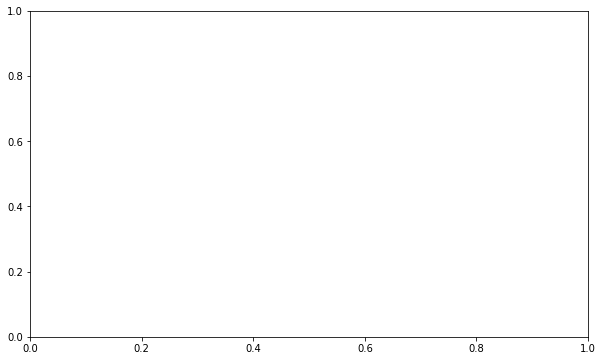

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test,y_pred_knn)

0.8027210884353742

In [87]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,2,1,1,1,2,0,94,3,2,0,4,0,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,0,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0,1373,1,2,2,0,1,4,4,1,92,2,1,0,3,0,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,0,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0,591,1,2,1,0,1,7,1,1,40,3,1,0,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [89]:
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(34, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [0]:
from sklearn.svm import SVC

In [0]:
svc=SVC(C=100,kernel="rbf")

In [93]:
model=svc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred=model.predict(x_test)

In [95]:
metrix=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(metrix)
print(report)

[[232   4]
 [ 40  18]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       236
           1       0.82      0.31      0.45        58

    accuracy                           0.85       294
   macro avg       0.84      0.65      0.68       294
weighted avg       0.85      0.85      0.82       294



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
DC=DecisionTreeClassifier(criterion="entropy",splitter="random")

In [0]:
model=DC.fit(x_train,y_train)

In [0]:
y_pred=model.predict(x_test)

In [101]:
accuracy_score(y_test,y_pred)

0.7891156462585034